# 평가

## 정확도

importing Jupyter notebook from titanic_sklearn_clf.ipynb

 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket 

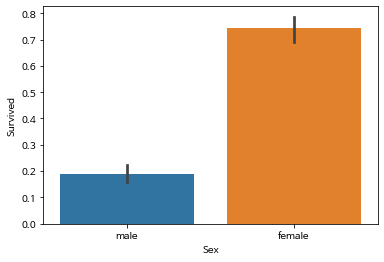

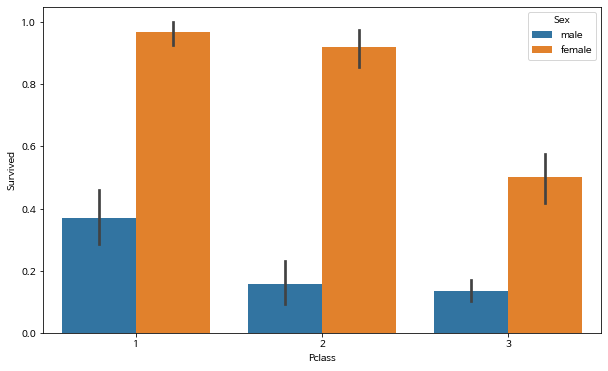

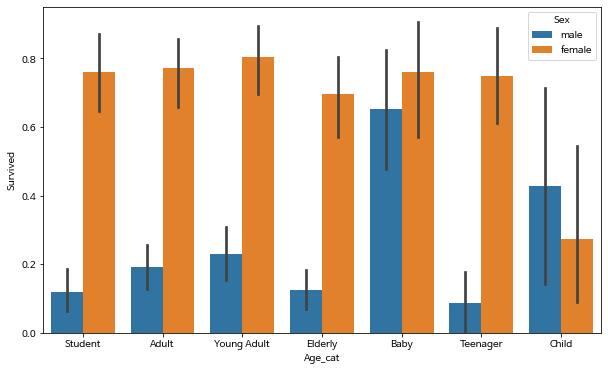

In [1]:
import import_ipynb
import titanic_sklearn_clf as tsc

- Sex 가 1일때 0 아니면 1

In [2]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train = pd.read_csv('./titanic/train.csv')
y = train['Survived']
x = train.drop('Survived',axis=1)
x = tsc.transform_features(x)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [4]:
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypred = myclf.predict(X_test)
print('ACC : {0:.4f}'.format(accuracy_score(y_test,mypred)))

ACC : 0.7877


### mnist를 7인지만 분류하는 이진분류로

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    
digits = load_digits()

y = (digits.target == 7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
print('0,1 distribution')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print('ACC : {0:.4f}'.format(accuracy_score(y_test,fakepred)))

0,1 distribution
0    405
1     45
dtype: int64
ACC : 0.9000


# 정밀도와 재현율

## 정밀도(precision) = ${TP \over (FP + TP)}$  
실제 음성인 데이터 예측을 양성으로 잘못 판단하면 안되는 경우

## 재현율(recall) ${TP \over (FN+ TP)}$  
실제 양성인 데이터예측을 음성으로 잘못 판단하면 안되는 경우

In [7]:
import import_ipynb
from titanic_sklearn_clf import transform_features

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print('acc:{0:.4f}, precision:{1:.4f}, recall:{2:.4f}'.format(accuracy,precision,recall))

In [9]:
titanic_df = pd.read_csv('titanic/train.csv')

y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df,y_titanic_df,
                                                   test_size=0.2, random_state=42)

lr_clf = LogisticRegression(max_iter=1000)

lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

confusion matrix
[[91 14]
 [18 56]]
acc:0.8212, precision:0.8000, recall:0.7568


각 클래스 확률 반환(pred_proba)

In [10]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)

print('pred_proba 결과: ', pred_proba.shape)
print('3개 샘플',pred_proba[:3])
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print(pred_proba_result[:3])

pred_proba 결과:  (179, 2)
3개 샘플 [[0.88826362 0.11173638]
 [0.79595771 0.20404229]
 [0.8592828  0.1407172 ]]
[[0.88826362 0.11173638 0.        ]
 [0.79595771 0.20404229 0.        ]
 [0.8592828  0.1407172  0.        ]]


threshold 기준 분류하기

In [11]:
from sklearn.preprocessing import Binarizer

x = [[1,-1, 2],
     [2, 0, 0],
     [0,1.1,1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [12]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold)
custom_pred = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test,custom_pred)

confusion matrix
[[91 14]
 [18 56]]
acc:0.8212, precision:0.8000, recall:0.7568


In [13]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold)
custom_pred = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test,custom_pred)

confusion matrix
[[85 20]
 [16 58]]
acc:0.7989, precision:0.7436, recall:0.7838


이와 같이 분류 기준에 따라 값이 변함

* * * 

sklearn 활용하여 임곗값 별 정밀도, 재현율 구하기

In [14]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print('임곗값 배열 shape:', thresholds.shape)

thr_idx = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출용 임계값', thr_idx)
print('샘플용 10개', np.round(thresholds[thr_idx],2))

print('임계값 별 정밀도',np.round(precisions[thr_idx],3))
print('임계값 별 재현율',np.round(recalls[thr_idx],3))

임곗값 배열 shape: (171,)
샘플 추출용 임계값 [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개 [0.07 0.11 0.12 0.14 0.17 0.29 0.38 0.56 0.65 0.75 0.88 0.95]
임계값 별 정밀도 [0.42  0.453 0.483 0.543 0.598 0.68  0.744 0.806 0.882 0.972 1.    1.   ]
임계값 별 재현율 [1.    0.986 0.932 0.932 0.905 0.892 0.824 0.73  0.608 0.473 0.284 0.081]


임계값에 따른 정밀도 재현율 시각화

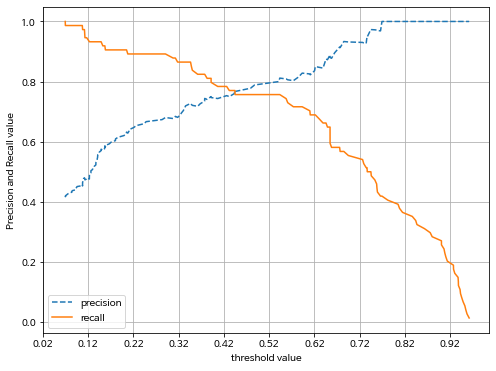

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(x_test)[:,1])

## F1-Score = ${2 \over {1 \over recall} + {1 \over precision}}$

In [16]:
from sklearn.metrics import f1_score
f1= f1_score(y_test,pred)
print(f1)

0.7777777777777778


In [ ]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print('acc: {0:.4f}, prec: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]

pred_proba = lr_clf.predict(x_test)
get_clf_eval